# Ambar Roy
CNN model used on Cifar-100

# Import statements

In [53]:
import keras
from keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,Dropout
from keras.datasets import cifar100
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Loading training data and test data

In [54]:
(x_train, y_train), (x_test, y_test)=cifar100.load_data(label_mode='coarse')
# print(x_test.shape)
# x_train=x_train.reshape(50000,32,32,3,1)
x_train=x_train.astype('float')
x_train/=255
# x_test=x_test.reshape(10000,32,32,3,1)
x_test=x_test.astype('float')
x_test/=255
y_train=keras.utils.to_categorical(y_train,100)
y_test=keras.utils.to_categorical(y_test,100)

# Creating Model

In [62]:
# Author Ambar Roy
cnn=keras.models.Sequential()
cnn.add(Conv2D(64, (3, 3),name='Conv1', activation='relu', input_shape=(32, 32, 3)))
cnn.add(Conv2D(128, (3, 3),name='Conv2', activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2),name='MP1'))
cnn.add(Dropout(0.25,name='Drop1'))

cnn.add(Conv2D(256, (3, 3),name='Conv3', activation='relu'))
cnn.add(Conv2D(512, (3, 3),name='Conv4', activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2),name='MP2'))
cnn.add(Dropout(0.25,name='Drop2'))

cnn.add(Flatten(name='Flatten'))
cnn.add(Dense(1024, activation='relu',name='Dense1'))
cnn.add(Dropout(0.5,name='Drop3'))
cnn.add(Dense(100, name='OL', activation='softmax'))
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')
cnn.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv1 (Conv2D)              (None, 30, 30, 64)        1792      
                                                                 
 Conv2 (Conv2D)              (None, 28, 28, 128)       73856     
                                                                 
 MP1 (MaxPooling2D)          (None, 14, 14, 128)       0         
                                                                 
 Drop1 (Dropout)             (None, 14, 14, 128)       0         
                                                                 
 Conv3 (Conv2D)              (None, 12, 12, 256)       295168    
                                                                 
 Conv4 (Conv2D)              (None, 10, 10, 512)       1180160   
                                                                 
 MP2 (MaxPooling2D)          (None, 5, 5, 512)       

# Training Model

Epoch 1/2
40/40 [==============================] - 453s 11s/step - loss: 0.1709 - accuracy: 0.9446 - val_loss: 0.0254 - val_accuracy: 0.9966
Epoch 2/2
40/40 [==============================] - 407s 10s/step - loss: 0.1214 - accuracy: 0.9602 - val_loss: 0.0220 - val_accuracy: 0.9968


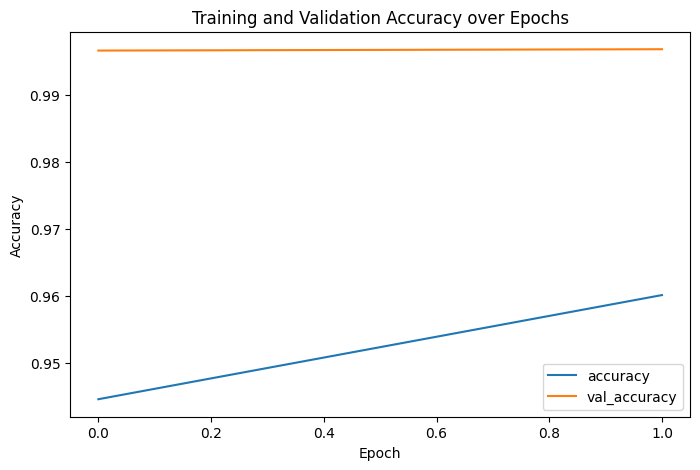

In [72]:
# cnn.load_weights('weights/cnn-model5.h5')
history=cnn.fit(x_train, y_train, verbose=1, batch_size=1024, epochs=2, validation_split=0.2, shuffle=True)
pd.DataFrame(history.history)['accuracy'].plot(figsize=(8,5))
pd.DataFrame(history.history)['val_accuracy'].plot(figsize=(8,5))
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy over Epochs')
plt.show()

# Testing Model

In [ ]:
cnn.evaluate(x_test,y_test)